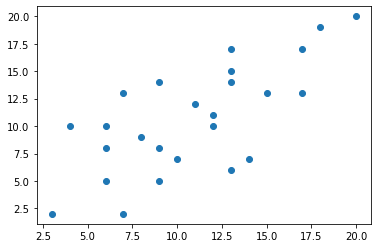

In [21]:
import matplotlib.pyplot as plt
import numpy as np
#长度为x1，宽度为x2
x1 = [3,4,6,6,6,7,7,8,9,9,9,10,11,12,12,13,13,13,13,14,15,17,17,18,20]
x2 = [2,10,5,8,10,2,13,9,5,8,14,7,12,10,11,6,14,15,17,7,13,13,17,19,20]
plt.scatter(x1, x2) #绘图_未标准化数据
plt.show()

长度的均值： 10.88 长度的方差： 19.4656 长度的标准差： 4.411983680840173
宽度的均值： 10.68 宽度的方差： 23.097600000000003 宽度的标准差： 4.805996254680189
x1标准化后成为x1_S：
 [-1.7860446842132052, -1.5593892674348795, -1.1060784338782286, -1.1060784338782286, -1.1060784338782286, -0.8794230170999031, -0.8794230170999031, -0.6527676003215777, -0.4261121835432521, -0.4261121835432521, -0.4261121835432521, -0.1994567667649266, 0.027198650013398884, 0.2538540667917244, 0.2538540667917244, 0.48050948357004986, 0.48050948357004986, 0.48050948357004986, 0.48050948357004986, 0.7071649003483753, 0.9338203171267009, 1.387131150683352, 1.387131150683352, 1.6137865674616774, 2.0670974010183283]
x2标准化后成为x2_S：
 [-1.8060771461374354, -0.14148991467436126, -1.1818569343387826, -0.5576367225401297, -0.14148991467436126, -1.8060771461374354, 0.48273029712429155, -0.34956331860724554, -1.1818569343387826, -0.5576367225401297, 0.6908037010571758, -0.7657101264730141, 0.2746568931914073, -0.14148991467436126, 0.06658348925852303, -0.9737835304058

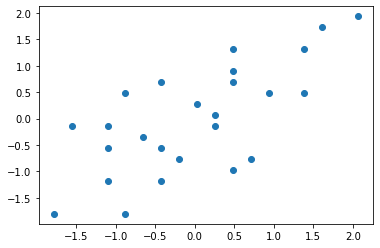

In [25]:
#通过数据求出均值，方差，标准差，以及标准化后的新数据
mean_x1 = np.mean(x1)
var_x1 = np.var(x1)
std_x1 = np.std(x1,ddof = 0)
print("长度的均值：",mean_x1,"长度的方差：",var_x1,"长度的标准差：",std_x1)
mean_x2 = np.mean(x2)
var_x2 = np.var(x2)
std_x2 = np.std(x2,ddof = 0)
print("宽度的均值：",mean_x2,"宽度的方差：",var_x2,"宽度的标准差：",std_x2)
x1_S=[(x-mean_x1)/std_x1 for x in x1]
x2_S=[(x-mean_x2)/std_x2 for x in x2]
print("x1标准化后成为x1_S：\n",x1_S)
print("x2标准化后成为x2_S：\n",x2_S)
print("标准化后的均值：\n",np.mean(x1_S),np.mean(x2_S))
print("标准化后的方差：\n",np.var(x1_S),np.var(x2_S))
print("标准化后的标准差：\n",np.std(x1_S,ddof=0),np.std(x2_S,ddof=0))
plt.scatter(x1_S, x2_S) #绘图_标准化后数据
plt.show()

标准化变量的意义在于：避免量纲不同而导致的方差过大，从而影响贡献率，影响判断的问题。

对于$X = (X_1,X_2,X_3\cdots,X_p)^T$，设$\mu_k = E(X_k)$,$\sigma_{kk} = Var(X_k)$,$k = 1,2,\cdots,p$
则其标准化变量为
\begin{gather*}
X_k^* = \frac{X_k - \mu_k}{\sqrt \sigma_{kk}}
\end{gather*}

In [11]:
# 组合X1_S与X1_S从而求得相关系数矩阵
matrix = [x1_S,x2_S]
covariance= np.corrcoef(matrix)
print("相关系数矩阵：\n",covariance)
# 利用函数求出相关系数矩阵的特征值与对应特征向量
eigenvalue, featurevector = np.linalg.eig(covariance)
eigenvalueTotal = 0
for i in range(len(eigenvalue)):
    print("特征值",i+1,"：", eigenvalue[i])
    print("单位特征向量",i+1,"：", featurevector[i])    #输出特征值与对应特征向量
    eigenvalueTotal += eigenvalue[i]                    #特征值的和
sortedeigenvalue = sorted(eigenvalue,reverse = True)    #对特征值数组进行降序排序，以便最后输出最少贡献率成分
#由特征值可得知各成分的贡献率
for i in range(len(sortedeigenvalue)):
    print("第",i+1,"个主成分的贡献率:{:.2%}".format(sortedeigenvalue[i]/eigenvalueTotal))#输出各成分的贡献率

相关系数矩阵：
 [[1.         0.70560348]
 [0.70560348 1.        ]]
特征值 1 ： 1.7056034803123779
单位特征向量 1 ： [ 0.70710678 -0.70710678]
特征值 2 ： 0.29439651968762215
单位特征向量 2 ： [0.70710678 0.70710678]
第 1 个主成分的贡献率:85.28%
第 2 个主成分的贡献率:14.72%


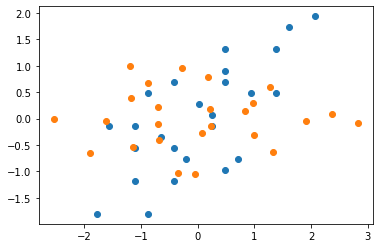

In [43]:
P = np.mat([featurevector[0],featurevector[1]])
x1_N = []
x2_N = []                #建立新坐标组
for i in range(len(x1_S)):
    mat = np.mat([x1_S[i],x2_S[i]]).dot(P).A
    x1_N.append(mat[0][0])
    x2_N.append(mat[0][1])
plt.scatter(x1_S, x2_S) #绘图_标准化后数据    蓝！
plt.scatter(x1_N, x2_N) #绘图_标准化后数据经坐标转换后    橙！
plt.show()